# Example 7: RVT Peak Calculators

Use RVT input motion with:
1. Boore & Thompson (2012) -- based on Cartwright and Longuet-Higgins (56) peak factor with corrections for oscillator duration 
2. Boore & Thompson (2015) -- based on Vanmarcke (75) peak factor with corrections for oscillator duration
3. Wang & Rathje (2018) --  based on Vanmarcke (75) peak factor with corrections for oscillator duration and site transfer function

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import pystrata

%matplotlib inline

In [ ]:
# Increased figure sizes
plt.rcParams["figure.dpi"] = 120

## Create a point source theory RVT motion

In [ ]:
def create_motion(calculator):
    mag = 7.0
    dist = 30.0
    region = "wna"
    m = pystrata.motion.SourceTheoryRvtMotion(
        mag,
        dist,
        region,
        peak_calculator=calculator,
        # These calculators need to know about the event for the RMS duration correction
        calc_kwds={
            "region": region,
            "mag": mag,
            "dist": dist,
        },
    )
    return m


calculator_names = ["BT12", "BT15", "WR18"]
motions = [create_motion(cn) for cn in calculator_names]

In [ ]:
for m in motions:
    m.calc_fourier_amps()

## Create site profile

Create a simple soil profile with a single soil layer with nonlinear properties defined by the Darendeli nonlinear model.

In [ ]:
profile = pystrata.site.Profile(
    [
        pystrata.site.Layer(pystrata.site.SoilType("Soil", 18.0, None, 0.02), 300, 600),
        pystrata.site.Layer(pystrata.site.SoilType("Rock", 24.0, None, 0.01), 0, 2000),
    ]
)

## Create the site response calculator

In [ ]:
calc = pystrata.propagation.LinearElasticCalculator()

## Specify the output

In [ ]:
freqs = np.logspace(-1, 2, num=500)
outputs = pystrata.output.OutputCollection(
    [
        pystrata.output.ResponseSpectrumOutput(
            # Frequency
            freqs,
            # Location out (numerator)
            pystrata.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ),
        pystrata.output.ResponseSpectrumRatioOutput(
            # Frequency
            freqs,
            # Location in (denominator),
            pystrata.output.OutputLocation("outcrop", index=-1),
            # Location out (numerator)
            pystrata.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ),
    ]
)

## Perform the calculation

Compute the response of the site, and store the state within the calculation object. Use the calculator, to compute the outputs.

In [ ]:
for m in motions:
    calc(m, profile, profile.location("outcrop", index=-1))
    outputs(calc, m.peak_calculator.ABBREV)

## Plot the outputs

Create a few plots of the output.

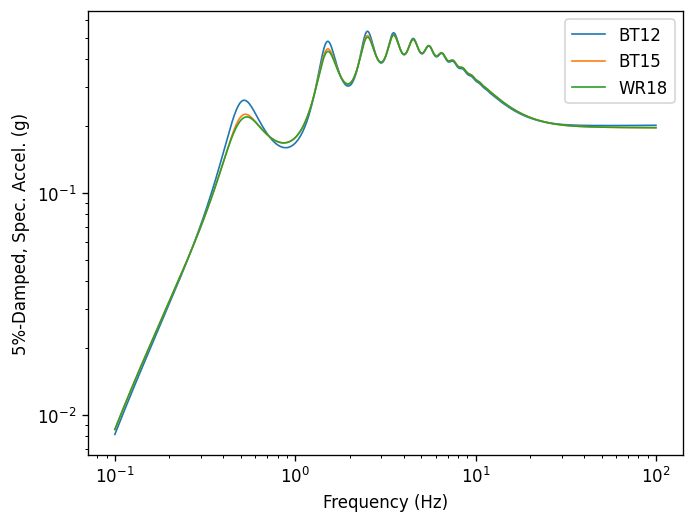

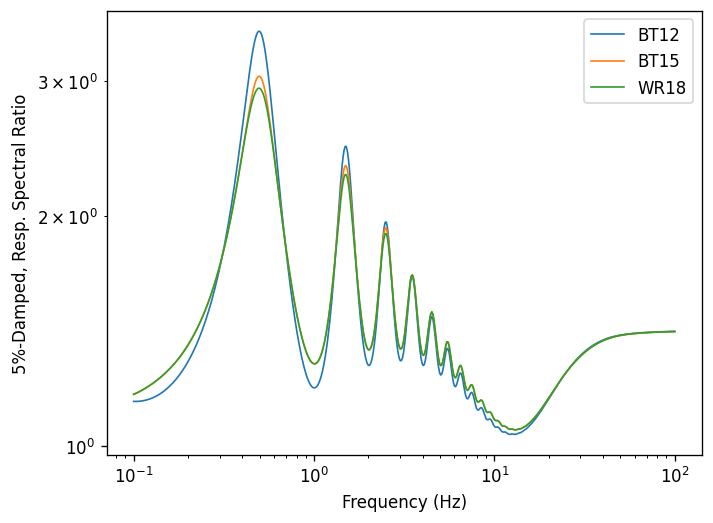

In [ ]:
for o in outputs:
    o.plot(style="indiv")